# 🔬 Phenotype Classification Project
This notebook integrates the entire pipeline using modular code from `src/`

In [2]:
# Add src to path to import modules
import sys
sys.path.append('../src')

# Import our custom modules
from utils import load_data, clean_data, encode_labels, split_data, save_model, load_model
from train_model import train_random_forest, evaluate_model, plot_confusion_matrix
from predict import predict

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('✅ All modules imported successfully!')

✅ All modules imported successfully!


## 📂 Load and Prepare Data

In [3]:
# Load data
df = load_data('../data/dataset.csv')
print(f'Dataset shape: {df.shape}')

# Clean data
df = clean_data(df)

# Encode labels
df = encode_labels(df, 'label')

df.head()

Dataset shape: (1000, 26)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,label
0,-0.950027,-4.823693,0.098040,0.176071,-3.405527,-4.515365,0.231272,-1.602994,-1.168142,0.566777,...,0.110691,-3.195430,-1.703170,-1.276106,0.705884,0.371630,2.032241,1.558405,2.274818,0
1,-0.250303,1.473141,-0.356638,0.187378,-0.445104,-1.590974,-0.140981,0.287161,0.742004,0.240448,...,0.253887,-3.098526,1.485243,0.030873,-1.246679,0.669943,0.352109,-0.426326,3.406395,1
2,1.011340,-0.981668,-0.094143,-0.674892,-0.652019,-1.452816,0.738799,-0.473630,0.031785,0.749786,...,-0.577565,-2.156542,3.433031,0.464304,0.120664,0.754350,3.946145,-1.100095,-2.991957,0
3,-1.879244,2.212891,0.657636,-0.014560,2.424188,-1.075100,0.232465,0.685069,2.935476,0.118778,...,1.389868,-1.840437,0.746267,-0.024023,-1.167365,-2.032974,2.018766,1.395564,3.124452,1
4,1.885076,0.450507,0.423559,3.452865,-0.937176,0.419032,0.111140,1.716358,2.150967,2.230818,...,-2.236426,-3.041974,2.023001,-2.353483,1.890523,0.300547,0.256510,1.459538,-2.466504,2


## 🎯 Train/Test Split

In [4]:
X_train, X_test, y_train, y_test = split_data(df)
print(f'Training set: {X_train.shape}')
print(f'Test set: {X_test.shape}')

Training set: (800, 25)
Test set: (200, 25)


## 🌲 Train Random Forest Model

In [5]:
# Train model
model = train_random_forest(X_train, y_train, n_estimators=200)
print('✅ Model training complete!')

✅ Model training complete!


## 📊 Evaluate Model Performance

In [6]:
# Evaluate on test set
preds = evaluate_model(model, X_test, y_test)

Accuracy: 0.7750

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        68
           1       0.70      0.70      0.70        66
           2       0.83      0.86      0.84        66

    accuracy                           0.78       200
   macro avg       0.77      0.78      0.77       200
weighted avg       0.77      0.78      0.77       200



## 🔢 Confusion Matrix

In [7]:
plot_confusion_matrix(y_test, preds, save_path='../models/confusion_matrix.png')

Confusion matrix saved to ../models/confusion_matrix.png


## 💾 Save Trained Model

In [8]:
save_model(model, '../models/model.pkl')

Model saved to ../models/model.pkl


## 🤖 SHAP Explainability Analysis

Binary classification


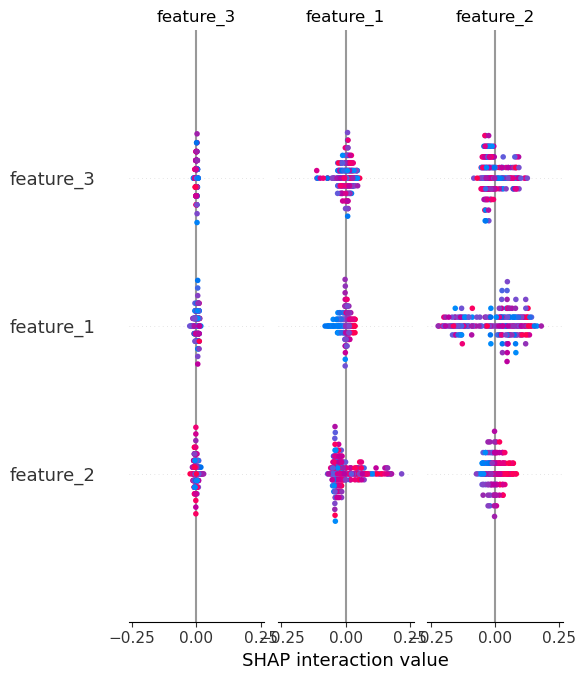

In [9]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
if isinstance(shap_values, list):
    print(f'Multi-class problem with {len(shap_values)} classes')
    shap.summary_plot(shap_values, X_test)
else:
    print('Binary classification')
    shap.summary_plot(shap_values, X_test)

## 🔮 Make Predictions on New Data

In [11]:
# Example: Predict on test set
predictions, probabilities = predict(model, X_test)

print(f'Predictions shape: {predictions.shape}')
print(f'First 10 predictions: {predictions[:10]}')
print(f'\nPrediction probabilities shape: {probabilities.shape}')

# For new data, uncomment:
# new_df = pd.read_csv('../data/new_data.csv')
# new_df_clean = clean_data(new_df)
# new_predictions, new_probs = predict(model, new_df_clean)

Predictions shape: (200,)
First 10 predictions: [1 2 1 1 2 1 2 0 0 0]

Prediction probabilities shape: (200, 3)
